# BME 450000 Machine Learning Project

## Exploratory Data Analysis

In [5]:
from pathlib import Path

calc_case_train_path = Path("csv/calc_case_description_train_set.csv")  #Create file path for train set. Contains image labels for several categories
calc_case_test_path = Path("csv/calc_case_description_test_set.csv")    #Create file path for test set. Contains image labels for several categories
dicom_info_path = Path("csv/dicom_info.csv")                            #Create file path for dicom. This contains image file metadata

In [6]:
import pandas as pd

dicom_info_df = pd.read_csv(dicom_info_path)  # Import dicom csv into an array
dicom_info_df["image_path"] = dicom_info_df["image_path"].apply(lambda row: row[row.find("/") + 1:])  # Remove beginning "DDSM/" from each image path cell

dicom_info_df.head()

,file_path,image_path,AccessionNumber,BitsAllocated,BitsStored,BodyPartExamined,Columns,ContentDate,ContentTime,ConversionType,...,SecondaryCaptureDeviceManufacturerModelName,SeriesDescription,SeriesInstanceUID,SeriesNumber,SmallestImagePixelValue,SpecificCharacterSet,StudyDate,StudyID,StudyInstanceUID,StudyTime
0,CBIS-DDSM/dicom/1.3.6.1.4.1.9590.100.1.2.12930...,jpeg/1.3.6.1.4.1.9590.100.1.2.1293087268128519...,NaN,16,16,BREAST,351,20160426,131732.685,WSD,...,MATLAB,cropped images,1.3.6.1.4.1.9590.100.1.2.129308726812851964007...,1,23078,ISO_IR 100,20160720.0,DDSM,1.3.6.1.4.1.9590.100.1.2.271867287611061855725...,214951.0
1,CBIS-DDSM/dicom/1.3.6.1.4.1.9590.100.1.2.24838...,jpeg/1.3.6.1.4.1.9590.100.1.2.2483867420106785...,NaN,16,16,BREAST,3526,20160426,143829.101,WSD,...,MATLAB,full mammogram images,1.3.6.1.4.1.9590.100.1.2.248386742010678582309...,1,0,ISO_IR 100,20160720.0,DDSM,1.3.6.1.4.1.9590.100.1.2.161516517311681906612...,193426.0
2,CBIS-DDSM/dicom/1.3.6.1.4.1.9590.100.1.2.26721...,jpeg/1.3.6.1.4.1.9590.100.1.2.2672131710111718...,NaN,16,16,BREAST,1546,20160503,111956.298,WSD,...,MATLAB,full mammogram images,1.3.6.1.4.1.9590.100.1.2.267213171011171858918...,1,0,ISO_IR 100,20160807.0,DDSM,1.3.6.1.4.1.9590.100.1.2.291043622711253836701...,161814.0
3,CBIS-DDSM/dicom/1.3.6.1.4.1.9590.100.1.2.38118...,jpeg/1.3.6.1.4.1.9590.100.1.2.3811873696115245...,NaN,16,16,BREAST,97,20160503,115347.770,WSD,...,MATLAB,cropped images,1.3.6.1.4.1.9590.100.1.2.381187369611524586537...,1,32298,ISO_IR 100,20170829.0,DDSM,1.3.6.1.4.1.9590.100.1.2.335006093711888937440...,180109.0
4,CBIS-DDSM/dicom/1.3.6.1.4.1.9590.100.1.2.38118...,jpeg/1.3.6.1.4.1.9590.100.1.2.3811873696115245...,NaN,8,8,Left Breast,3104,20160503,115347.770,WSD,...,MATLAB,NaN,1.3.6.1.4.1.9590.100.1.2.381187369611524586537...,1,0,ISO_IR 100,NaN,DDSM,1.3.6.1.4.1.9590.100.1.2.335006093711888937440...,NaN


In [7]:
dicom_info_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10237 entries, 0 to 10236
Data columns (total 38 columns):
 #   Column                                       Non-Null Count  Dtype  
---  ------                                       --------------  -----  
 0   file_path                                    10237 non-null  object 
 1   image_path                                   10237 non-null  object 
 2   AccessionNumber                              0 non-null      float64
 3   BitsAllocated                                10237 non-null  int64  
 4   BitsStored                                   10237 non-null  int64  
 5   BodyPartExamined                             10237 non-null  object 
 6   Columns                                      10237 non-null  int64  
 7   ContentDate                                  10237 non-null  int64  
 8   ContentTime                                  10237 non-null  float64
 9   ConversionType                               10237 non-null  object 
 10

In [8]:
dicom_info_df["SeriesDescription"].value_counts() #Check how many of each series description type there is

SeriesDescription
cropped images           3567
ROI mask images          3247
full mammogram images    2857
Name: count, dtype: int64

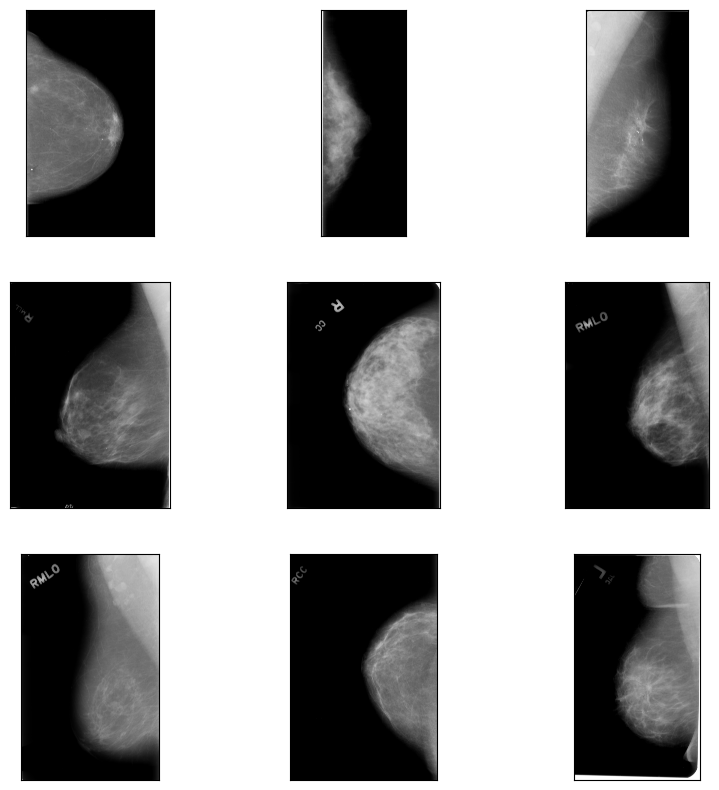

In [9]:
import PIL

from matplotlib import pyplot as plt

def plot_grid_of_images(image_paths, figsize=(10, 10), cmap="gray"):  #define function to display images
    fig, ax = plt.subplots(3, 3, figsize=figsize)                     #just gonna display 9 total to check
    for i, axi in enumerate(ax.flat):
        image = PIL.Image.open(image_paths[i])                        #open specified image from the previously defined path
        axi.imshow(image, cmap=cmap)
        axi.set(xticks=[], yticks=[])
    plt.show()

full_mammogram_images = dicom_info_df[dicom_info_df.SeriesDescription == "full mammogram images"]["image_path"].reset_index(drop=True)   #create an array with image paths for just the full mammogram images
plot_grid_of_images(full_mammogram_images[:9])   #call plotting function and plot 9 of the full mammogram images

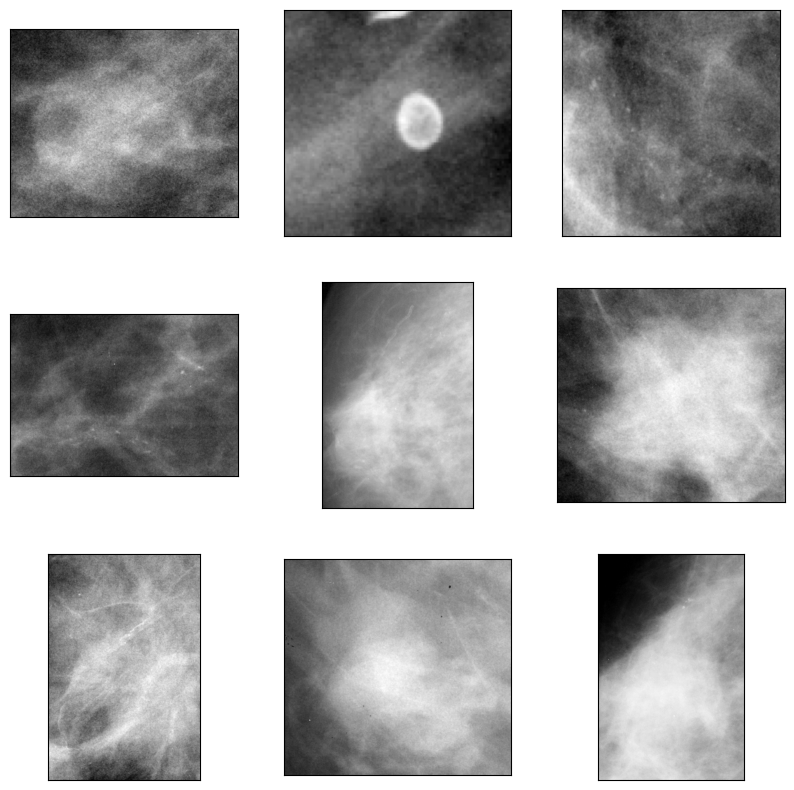

In [10]:
cropped_image = dicom_info_df[dicom_info_df.SeriesDescription == "cropped images"]["image_path"].reset_index(drop=True) #create an array of the image paths correlated to just cropped images
plot_grid_of_images(cropped_image[:9])   #display 9 cropped images

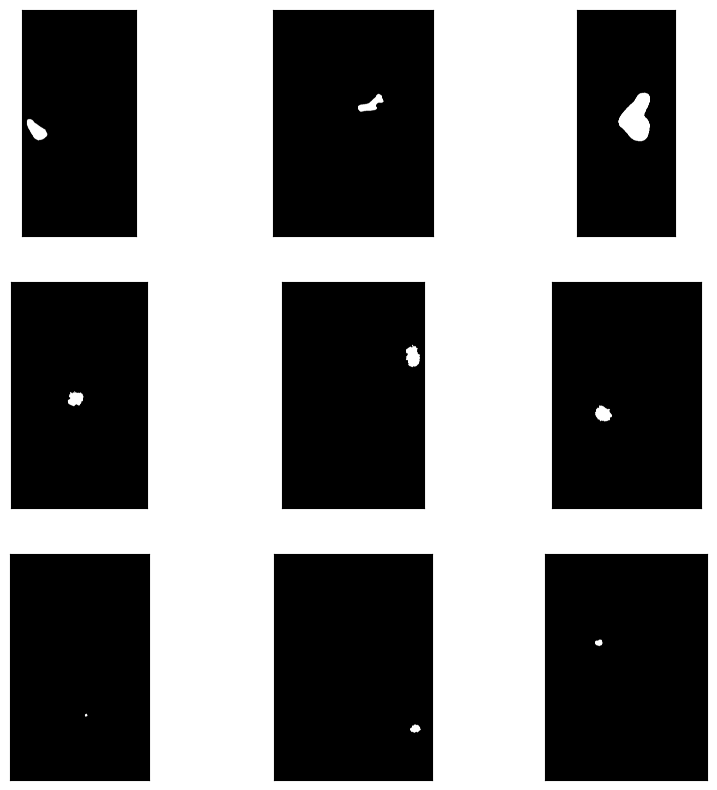

In [11]:
roi_image = dicom_info_df[dicom_info_df.SeriesDescription == "ROI mask images"]["image_path"].reset_index(drop=True)   #create an array of the image paths correlated to just ROI mask
plot_grid_of_images(roi_image[:9])   #display 9 of the ROI masks

In [12]:
calc_case_train_df = pd.read_csv(calc_case_train_path)   #create an array from the calc case train csv file
calc_case_test_df = pd.read_csv(calc_case_test_path)     #create an array from the calc case test csv file

calc_case_train_df.head()

,patient_id,breast density,left or right breast,image view,abnormality id,abnormality type,calc type,calc distribution,assessment,pathology,subtlety,image file path,cropped image file path,ROI mask file path
0,P_00005,3,RIGHT,CC,1,calcification,AMORPHOUS,CLUSTERED,3,MALIGNANT,3,Calc-Training_P_00005_RIGHT_CC/1.3.6.1.4.1.959...,Calc-Training_P_00005_RIGHT_CC_1/1.3.6.1.4.1.9...,Calc-Training_P_00005_RIGHT_CC_1/1.3.6.1.4.1.9...
1,P_00005,3,RIGHT,MLO,1,calcification,AMORPHOUS,CLUSTERED,3,MALIGNANT,3,Calc-Training_P_00005_RIGHT_MLO/1.3.6.1.4.1.95...,Calc-Training_P_00005_RIGHT_MLO_1/1.3.6.1.4.1....,Calc-Training_P_00005_RIGHT_MLO_1/1.3.6.1.4.1....
2,P_00007,4,LEFT,CC,1,calcification,PLEOMORPHIC,LINEAR,4,BENIGN,4,Calc-Training_P_00007_LEFT_CC/1.3.6.1.4.1.9590...,Calc-Training_P_00007_LEFT_CC_1/1.3.6.1.4.1.95...,Calc-Training_P_00007_LEFT_CC_1/1.3.6.1.4.1.95...
3,P_00007,4,LEFT,MLO,1,calcification,PLEOMORPHIC,LINEAR,4,BENIGN,4,Calc-Training_P_00007_LEFT_MLO/1.3.6.1.4.1.959...,Calc-Training_P_00007_LEFT_MLO_1/1.3.6.1.4.1.9...,Calc-Training_P_00007_LEFT_MLO_1/1.3.6.1.4.1.9...
4,P_00008,1,LEFT,CC,1,calcification,NaN,REGIONAL,2,BENIGN_WITHOUT_CALLBACK,3,Calc-Training_P_00008_LEFT_CC/1.3.6.1.4.1.9590...,Calc-Training_P_00008_LEFT_CC_1/1.3.6.1.4.1.95...,Calc-Training_P_00008_LEFT_CC_1/1.3.6.1.4.1.95...


In [13]:
calc_case_train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1546 entries, 0 to 1545
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   patient_id               1546 non-null   object
 1   breast density           1546 non-null   int64 
 2   left or right breast     1546 non-null   object
 3   image view               1546 non-null   object
 4   abnormality id           1546 non-null   int64 
 5   abnormality type         1546 non-null   object
 6   calc type                1526 non-null   object
 7   calc distribution        1170 non-null   object
 8   assessment               1546 non-null   int64 
 9   pathology                1546 non-null   object
 10  subtlety                 1546 non-null   int64 
 11  image file path          1546 non-null   object
 12  cropped image file path  1546 non-null   object
 13  ROI mask file path       1546 non-null   object
dtypes: int64(4), object(10)
memory usage: 16

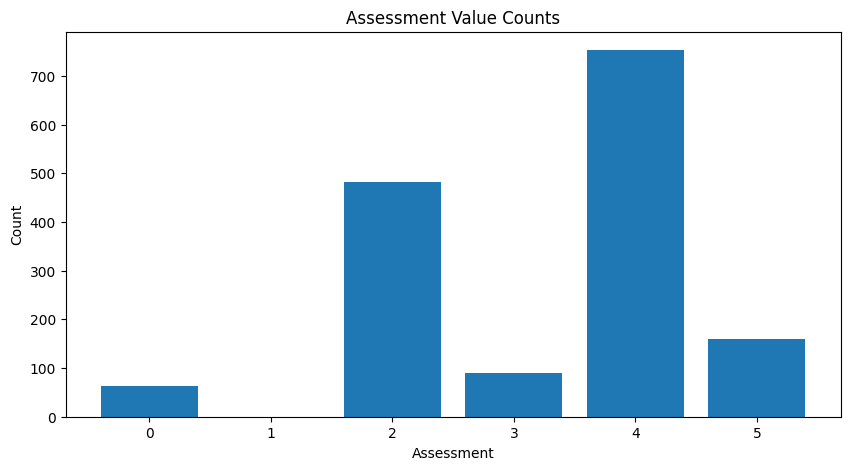

In [14]:
assessment_value_counts = calc_case_train_df.assessment.value_counts()   #count number of instances each unique value shows up in the assessment column and place in an array

plt.figure(figsize=(10, 5))
plt.bar(assessment_value_counts.index, assessment_value_counts.values)   #create a bar graph of the assememnt value instances
plt.title("Assessment Value Counts")
plt.xlabel("Assessment")
plt.ylabel("Count")
plt.show()

In [15]:
dicom_info_df[dicom_info_df["PatientID"].str.contains("P_00005", na=False)]["PatientID"].value_counts()   #count number of image files in DICOM correlated to the P_00005 patient ID

PatientID
Calc-Training_P_00005_RIGHT_MLO_1    2
Calc-Training_P_00005_RIGHT_CC_1     2
Calc-Training_P_00005_RIGHT_CC       1
Calc-Training_P_00005_RIGHT_MLO      1
Name: count, dtype: int64

In [16]:
calc_case_train_df[calc_case_train_df["patient_id"].str.contains("P_00005", na=False)]["patient_id"].value_counts()   #count number of image files in the calc case train set

patient_id
P_00005    2
Name: count, dtype: int64

In [34]:
train_df = dicom_info_df.copy()[['image_path', 'PatientID', 'SeriesDescription']]   #create a new training dataset that just contains 3 columns from DICOM
train_df = train_df[train_df['SeriesDescription'] == 'cropped images']   #remove any rows that aren't cropped images (we are just going to look at the cropped images for this project)

patient_id_pattern = r"(P_\d{5})"   #This variable is the pattern of patient ID that needs to be extracted
train_df['patient_id'] = train_df['PatientID'].str.extract(patient_id_pattern, expand=False)   #in the PatientID column, we are extracting just the ID which is in the form P_ followed by 5 digits

train_df = train_df.drop(['PatientID'], axis=1)   #removing the old patient ID column
train_df = train_df.drop(['SeriesDescription'], axis=1)   #remove the series description column because all are cropped images now
train_df = train_df.reset_index(drop=True)
train_df.head()   #confirming train_df is just image path and patient id now


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3567 entries, 0 to 3566
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   image_path  3567 non-null   object
 1   patient_id  3567 non-null   object
dtypes: object(2)
memory usage: 55.9+ KB


In [18]:
train_df.info()  #confirming both columns are the same length


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3567 entries, 0 to 3566
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   image_path  3567 non-null   object
 1   patient_id  3567 non-null   object
dtypes: object(2)
memory usage: 55.9+ KB


In [19]:
train_df = train_df.merge(calc_case_train_df, on='patient_id', how='left')  #add the calc case train set matching up the patient id values from the two

train_df.head()

,image_path,patient_id,breast density,left or right breast,image view,abnormality id,abnormality type,calc type,calc distribution,assessment,pathology,subtlety,image file path,cropped image file path,ROI mask file path
0,jpeg/1.3.6.1.4.1.9590.100.1.2.1293087268128519...,P_01265,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,jpeg/1.3.6.1.4.1.9590.100.1.2.3811873696115245...,P_00562,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,jpeg/1.3.6.1.4.1.9590.100.1.2.1533390529131213...,P_00181,4.0,RIGHT,CC,1.0,calcification,PLEOMORPHIC,CLUSTERED,4.0,BENIGN,1.0,Calc-Training_P_00181_RIGHT_CC/1.3.6.1.4.1.959...,Calc-Training_P_00181_RIGHT_CC_1/1.3.6.1.4.1.9...,Calc-Training_P_00181_RIGHT_CC_1/1.3.6.1.4.1.9...
3,jpeg/1.3.6.1.4.1.9590.100.1.2.1533390529131213...,P_00181,4.0,RIGHT,MLO,1.0,calcification,PLEOMORPHIC,CLUSTERED,4.0,BENIGN,1.0,Calc-Training_P_00181_RIGHT_MLO/1.3.6.1.4.1.95...,Calc-Training_P_00181_RIGHT_MLO_1/1.3.6.1.4.1....,Calc-Training_P_00181_RIGHT_MLO_1/1.3.6.1.4.1....
4,jpeg/1.3.6.1.4.1.9590.100.1.2.1789947146114851...,P_01015,2.0,LEFT,CC,1.0,calcification,PLEOMORPHIC,LINEAR,4.0,MALIGNANT,2.0,Calc-Training_P_01015_LEFT_CC/1.3.6.1.4.1.9590...,Calc-Training_P_01015_LEFT_CC_1/1.3.6.1.4.1.95...,Calc-Training_P_01015_LEFT_CC_1/1.3.6.1.4.1.95...


In [20]:
train_df = train_df[['image_path', 'assessment']]    #get rid of every column aside from the path and assessment
train_df = train_df.dropna()   #get rid of all the rows that have a NaN in it. This means the specific patient didn't have a cropped image
train_df['assessment'] = train_df['assessment'].astype(int)  #cast the assessment to an integer
train_df.info()   #verify all columns are the same length

<class 'pandas.core.frame.DataFrame'>
Index: 7586 entries, 2 to 9481
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   image_path  7586 non-null   object
 1   assessment  7586 non-null   int32 
dtypes: int32(1), object(1)
memory usage: 148.2+ KB


In [21]:
train_df.head()

,image_path,assessment
2,jpeg/1.3.6.1.4.1.9590.100.1.2.1533390529131213...,4
3,jpeg/1.3.6.1.4.1.9590.100.1.2.1533390529131213...,4
4,jpeg/1.3.6.1.4.1.9590.100.1.2.1789947146114851...,4
5,jpeg/1.3.6.1.4.1.9590.100.1.2.1789947146114851...,4
6,jpeg/1.3.6.1.4.1.9590.100.1.2.4118334926123736...,4


In [22]:
train_df["assessment"].value_counts()

assessment
2    4755
4    1997
5     430
3     270
0     134
Name: count, dtype: int64

In [23]:
test_df = dicom_info_df.copy()[['image_path', 'PatientID', 'SeriesDescription']]   #create a new testingg dataset that just contains 3 columns from DICOM
test_df = test_df[test_df['SeriesDescription'] == 'cropped images']   #remove any rows that aren't cropped images (we are just going to look at the cropped images for this project)

patient_id_pattern = r"(P_\d{5})"   #This variable is the pattern of patient ID that needs to be extracted
test_df['patient_id'] = test_df['PatientID'].str.extract(patient_id_pattern, expand=False)   #in the PatientID column, we are extracting just the ID which is in the form P_ followed by 5 digits

test_df = test_df.drop(['PatientID'], axis=1)   #removing the old patient ID column
test_df = test_df.drop(['SeriesDescription'], axis=1)   #remove the series description column because all are cropped images now
test_df = test_df.reset_index(drop=True)
test_df.head()   #confirming test_df is just image path and patient id now

,image_path,patient_id
0,jpeg/1.3.6.1.4.1.9590.100.1.2.1293087268128519...,P_01265
1,jpeg/1.3.6.1.4.1.9590.100.1.2.3811873696115245...,P_00562
2,jpeg/1.3.6.1.4.1.9590.100.1.2.1533390529131213...,P_00181
3,jpeg/1.3.6.1.4.1.9590.100.1.2.1789947146114851...,P_01015
4,jpeg/1.3.6.1.4.1.9590.100.1.2.4118334926123736...,P_01497


In [24]:
test_df.info()  #confirming both columns are the same length

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3567 entries, 0 to 3566
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   image_path  3567 non-null   object
 1   patient_id  3567 non-null   object
dtypes: object(2)
memory usage: 55.9+ KB


In [25]:
test_df = test_df.merge(calc_case_test_df, on='patient_id', how='left')  #add the calc case train set matching up the patient id values from the two

test_df.head()

,image_path,patient_id,breast density,left or right breast,image view,abnormality id,abnormality type,calc type,calc distribution,assessment,pathology,subtlety,image file path,cropped image file path,ROI mask file path
0,jpeg/1.3.6.1.4.1.9590.100.1.2.1293087268128519...,P_01265,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,jpeg/1.3.6.1.4.1.9590.100.1.2.3811873696115245...,P_00562,2.0,LEFT,CC,1.0,calcification,LUCENT_CENTER,NaN,2.0,BENIGN_WITHOUT_CALLBACK,4.0,Calc-Test_P_00562_LEFT_CC/1.3.6.1.4.1.9590.100...,Calc-Test_P_00562_LEFT_CC_1/1.3.6.1.4.1.9590.1...,Calc-Test_P_00562_LEFT_CC_1/1.3.6.1.4.1.9590.1...
2,jpeg/1.3.6.1.4.1.9590.100.1.2.3811873696115245...,P_00562,2.0,LEFT,CC,2.0,calcification,LUCENT_CENTER,NaN,2.0,BENIGN_WITHOUT_CALLBACK,4.0,Calc-Test_P_00562_LEFT_CC/1.3.6.1.4.1.9590.100...,Calc-Test_P_00562_LEFT_CC_2/1.3.6.1.4.1.9590.1...,Calc-Test_P_00562_LEFT_CC_2/1.3.6.1.4.1.9590.1...
3,jpeg/1.3.6.1.4.1.9590.100.1.2.3811873696115245...,P_00562,2.0,LEFT,MLO,1.0,calcification,LUCENT_CENTER,NaN,2.0,BENIGN_WITHOUT_CALLBACK,4.0,Calc-Test_P_00562_LEFT_MLO/1.3.6.1.4.1.9590.10...,Calc-Test_P_00562_LEFT_MLO_1/1.3.6.1.4.1.9590....,Calc-Test_P_00562_LEFT_MLO_1/1.3.6.1.4.1.9590....
4,jpeg/1.3.6.1.4.1.9590.100.1.2.3811873696115245...,P_00562,2.0,LEFT,MLO,2.0,calcification,LUCENT_CENTER,NaN,2.0,BENIGN_WITHOUT_CALLBACK,4.0,Calc-Test_P_00562_LEFT_MLO/1.3.6.1.4.1.9590.10...,Calc-Test_P_00562_LEFT_MLO_2/1.3.6.1.4.1.9590....,Calc-Test_P_00562_LEFT_MLO_2/1.3.6.1.4.1.9590....


In [26]:
test_df = test_df[['image_path', 'assessment']]    #get rid of every column aside from the path and assessment
test_df = test_df.dropna()   #get rid of all the rows that have a NaN in it. This means the specific patient didn't have a cropped image
test_df['assessment'] = test_df['assessment'].astype(int)  #cast the assessment to an integer
test_df.info()   #verify all columns are the same length

<class 'pandas.core.frame.DataFrame'>
Index: 991 entries, 1 to 4186
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   image_path  991 non-null    object
 1   assessment  991 non-null    int32 
dtypes: int32(1), object(1)
memory usage: 19.4+ KB


In [27]:
test_df.head()

,image_path,assessment
1,jpeg/1.3.6.1.4.1.9590.100.1.2.3811873696115245...,2
2,jpeg/1.3.6.1.4.1.9590.100.1.2.3811873696115245...,2
3,jpeg/1.3.6.1.4.1.9590.100.1.2.3811873696115245...,2
4,jpeg/1.3.6.1.4.1.9590.100.1.2.3811873696115245...,2
5,jpeg/1.3.6.1.4.1.9590.100.1.2.3811873696115245...,2


In [28]:
from torch.utils.data import Dataset
from PIL import Image

class MammogramDataset(Dataset):                                #create a new class for the custom dataset
    def __init__(self, image_paths, labels, transform=None):    #instantiate the dataset object creating a directory for image tensors and labels
        self.image_paths = image_paths                          #image paths tensor
        self.labels = labels                                    #labels tensor
        self.transform = transform                              #image transform tensors

    def __len__(self):                                          #function returns length of the image path tensor
        return len(self.image_paths)

    def __getitem__(self, index):                               #function returns the index of the image path and label matchup
        image = Image.open(self.image_paths[index])
        if self.transform:
            image = self.transform(image)
        return image, self.labels[index]

In [29]:
from torch.utils.data import DataLoader
from torchvision import transforms

def get_dataloader(image_paths, labels, batch_size, shuffle):
    dataset = MammogramDataset(image_paths, labels, transform=transforms.Compose([transforms.Resize((224, 224)), transforms.ToTensor()]))  #generate dataset using the labels and the resized and transofrmed images in tensor form
    return DataLoader(dataset, batch_size=batch_size, shuffle=shuffle)

In [30]:
from sklearn.model_selection import train_test_split

#split the dataset into the training and validation sets
train_image_paths, val_image_paths, train_labels, val_labels = train_test_split(
    train_df["image_path"].values,
    train_df["assessment"].values,
    test_size=0.2,
    random_state=1,
    stratify=train_df["assessment"].values
)

test_image_paths, vals_image_paths, test_labels, vals_labels = train_test_split(
    test_df["image_path"].values,
    test_df["assessment"].values,
    test_size=0.0041,
    random_state=1,
    stratify=test_df["assessment"].values
)

#create separate arrays for the training and validation sets
train_dataloader = get_dataloader(train_image_paths, train_labels, batch_size=32, shuffle=True)
val_dataloader = get_dataloader(val_image_paths, val_labels, batch_size=32, shuffle=False)
test_dataloader = get_dataloader(test_image_paths, test_labels, batch_size=32, shuffle=False)



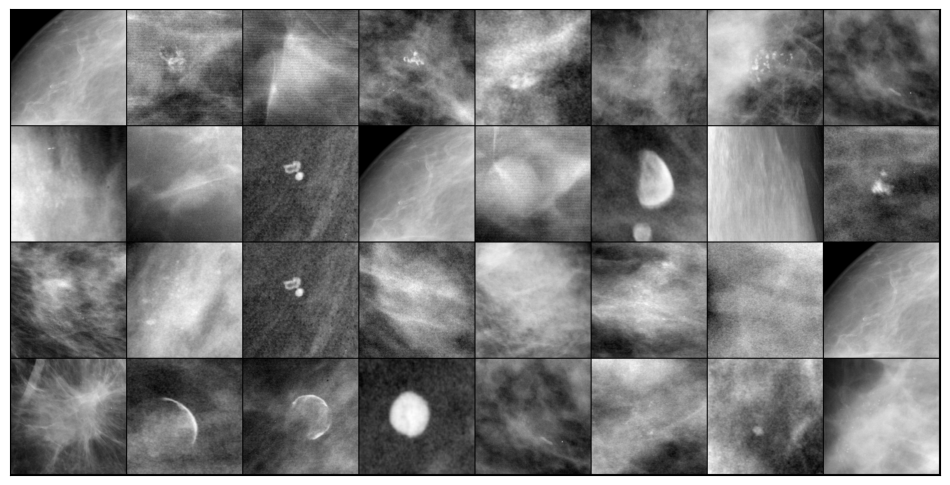

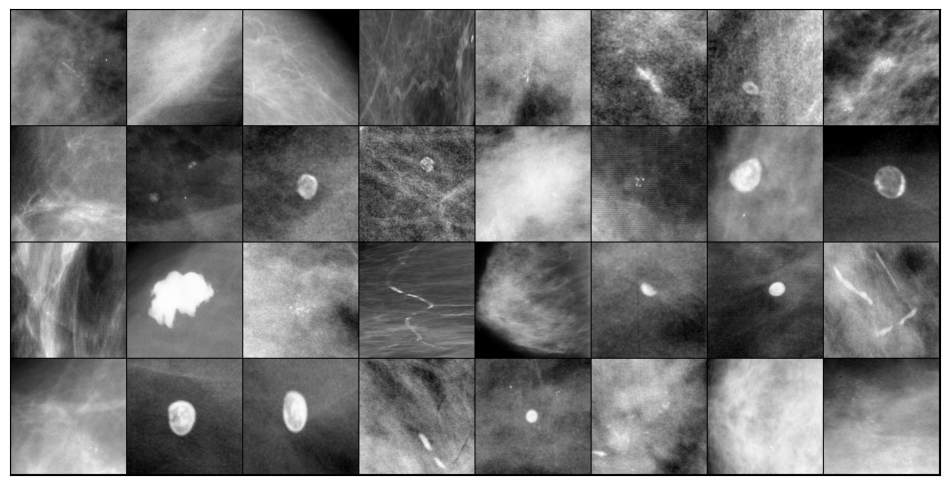

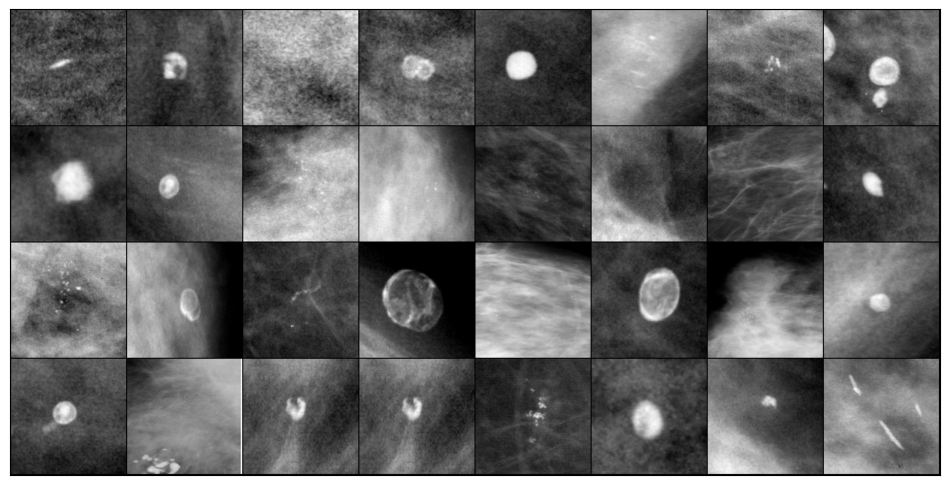

In [31]:
import numpy as np
import torchvision.utils as vutils

def show_batch(dl):                               #confirm the images are correcly uploaded. display several cropped images for reference
    for images, labels in dl:
        fig, ax = plt.subplots(figsize=(12, 12))
        ax.set_xticks([])
        ax.set_yticks([])
        ax.imshow(np.transpose(vutils.make_grid(images, padding=2, normalize=True).cpu(),(1,2,0)))
        break

show_batch(test_dataloader)
show_batch(train_dataloader)
show_batch(val_dataloader)

Epoch: 1 	Training Loss: 0.908363 	Validation Loss: 0.820128
Epoch: 2 	Training Loss: 0.788314 	Validation Loss: 0.701234
Epoch: 3 	Training Loss: 0.607585 	Validation Loss: 0.533520
Epoch: 4 	Training Loss: 0.393924 	Validation Loss: 0.427748
Epoch: 5 	Training Loss: 0.244552 	Validation Loss: 0.287966
Epoch: 6 	Training Loss: 0.167016 	Validation Loss: 0.306094
Epoch: 7 	Training Loss: 0.133471 	Validation Loss: 0.286758
Epoch: 8 	Training Loss: 0.123795 	Validation Loss: 0.248456
Epoch: 9 	Training Loss: 0.102125 	Validation Loss: 0.251899
Epoch: 10 	Training Loss: 0.092174 	Validation Loss: 0.289543
Epoch: 11 	Training Loss: 0.093550 	Validation Loss: 0.254994
Epoch: 12 	Training Loss: 0.090662 	Validation Loss: 0.251160
Epoch: 13 	Training Loss: 0.084167 	Validation Loss: 0.251312
Epoch: 14 	Training Loss: 0.080716 	Validation Loss: 0.266877
Epoch: 15 	Training Loss: 0.079390 	Validation Loss: 0.240340


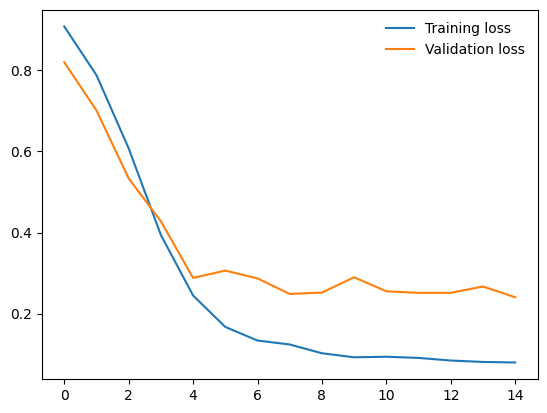

In [ ]:
import torch


class MammogramModel(torch.nn.Module):       #create the neural network model

    def __init__(self):
        super().__init__()
        self.conv1 = torch.nn.Conv2d(1, 16, 3, padding=1)       #first convolutional layer
        self.conv2 = torch.nn.Conv2d(16, 32, 3, padding=1)      #second convolutional layer
        self.conv3 = torch.nn.Conv2d(32, 64, 3, padding=1)     #third convolutional layer

        self.pool = torch.nn.MaxPool2d(2, 2)                    #improve efficiency by creating maximum pool for input signal

        self.fc1 = torch.nn.Linear(64 * 28 * 28, 512)          #first linear layer
        self.fc2 = torch.nn.Linear(512, 6)                      #second linear layer

    def forward(self, x):

        x = self.pool(torch.nn.functional.relu(self.conv1(x)))
        x = self.pool(torch.nn.functional.relu(self.conv2(x)))
        x = self.pool(torch.nn.functional.relu(self.conv3(x)))

        x = x.view(-1, 64 * 28 * 28)

        x = torch.nn.functional.relu(self.fc1(x))
        x = self.fc2(x)

        return x


model = MammogramModel()


import torch.optim as optim

criterion = torch.nn.CrossEntropyLoss()

optimizer = optim.Adam(model.parameters(), lr=0.001)

device = "cpu"

model.to(device)

def train_model(model, criterion, optimizer, train_dataloader, val_dataloader, num_epochs=15):
    train_losses = []
    val_losses = []
    for epoch in range(num_epochs):
        train_loss = 0.0
        val_loss = 0.0
        model.train()
        for data, target in train_dataloader:
            data, target = data.to(device), target.to(device)
            optimizer.zero_grad()
            output = model(data)
            output = output.type(torch.FloatTensor)
            target = target.type(torch.LongTensor)
            loss = criterion(output, target)
            loss.backward()
            optimizer.step()
            train_loss += loss.item() * data.size(0)
        model.eval()
        for data, target in val_dataloader:
            data, target = data.to(device), target.to(device)
            output = model(data)
            output = output.type(torch.FloatTensor)
            target = target.type(torch.LongTensor)
            loss = criterion(output, target)
            val_loss += loss.item() * data.size(0)
        train_loss = train_loss / len(train_dataloader.dataset)
        val_loss = val_loss / len(val_dataloader.dataset)
        train_losses.append(train_loss)
        val_losses.append(val_loss)
        print('Epoch: {} \tTraining Loss: {:.6f} \tValidation Loss: {:.6f}'.format(
            epoch + 1, train_loss, val_loss))
    return model, train_losses, val_losses


model, train_losses, val_losses = train_model(model, criterion, optimizer, train_dataloader, val_dataloader, num_epochs=15)

plt.plot(train_losses, label='Training loss')

plt.plot(val_losses, label='Validation loss')

plt.legend(frameon=False)

plt.show()

In [37]:
import torchvision.models as models

torch.save(model.state_dict(), 'Model_3.pth')

In [39]:
import torchvision.models as models
import torch
model.load_state_dict(torch.load('Model_3.pth'))

val_loss = []
device = "cpu"

for data, target in test_dataloader:
            data, target = data.to(device), target.to(device)
            output = model(data)
            output = output.type(torch.FloatTensor)
            target = target.type(torch.LongTensor)
            loss = criterion(output, target)
            val_loss += loss.item() * data.size(0)




RuntimeError: Given groups=1, weight of size [64, 3, 3, 3], expected input[32, 1, 224, 224] to have 3 channels, but got 1 channels instead